In [3]:
import numpy as np
import numpy.linalg as linalg
import pandas as pd

In [4]:
def linear_regression(X, y):
    return linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [5]:
# Load the data
data = np.loadtxt('quasar_train.csv', delimiter=',')

In [6]:
wavelengths = data[0]
fluxes = data[1]
ones = np.ones(fluxes.size)

df_ones = pd.DataFrame(ones, columns=['xint'])
df_wavelengths = pd.DataFrame(wavelengths, columns=['wavelength'])
df_fluxes = pd.DataFrame(fluxes, columns=['flux'])

df = pd.concat([df_ones, df_wavelengths, df_fluxes], axis=1)

In [24]:
X = pd.concat([df['xint'], df['wavelength']], axis=1)
y = df['flux']
x = X['wavelength']

In [12]:
theta = linear_regression(X, y)

In [13]:
print('theta = {}'.format(theta))

theta = [  2.51339906e+00  -9.81122145e-04]


In [19]:
p = np.poly1d([theta[1], theta[0]])
z = np.linspace(x[0], x[x.shape[0]-1])

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

In [116]:
fig = plt.figure(1, figsize=(12,10))
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (Watts/m^2')
plt.xticks(np.linspace(x[0], x[x.shape[0]-1], 10))
plt.yticks(np.linspace(-1, 9, 11))
scatter = plt.scatter(x, y, marker='+', color='purple', label='quasar data')
reg = plt.plot(z, p(z), color='blue', label='regression line')
plt.legend()

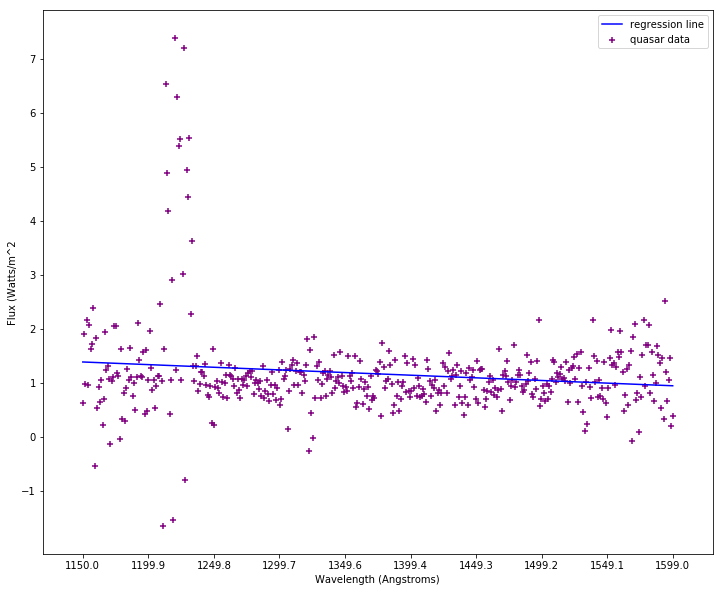

In [117]:
plt.show()